In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import simulate
import seaborn as sns
import calculate_return as cr
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')

ImportError: DLL load failed: Det angivne modul blev ikke fundet.

Fetching data

In [4]:
GARCH = cr.fetch_returns(sim_type = 'garch', random_seeds = range(10000))
norm = cr.fetch_returns(sim_type = 'norm', random_seeds = range(10000))
t = cr.fetch_returns(sim_type = 't', random_seeds = range(10000))
draw = cr.fetch_returns(sim_type = 'draw', random_seeds = range(10000))

Combining data

In [14]:
Data=GARCH[["dual_phase"]].rename(columns={'dual_phase':'GARCH'})
Data["Normal"]=norm["dual_phase"]
Data["Student's t"]=t["dual_phase"]
Data["Draws"]=draw["dual_phase"]

In [ ]:
Plotting figure

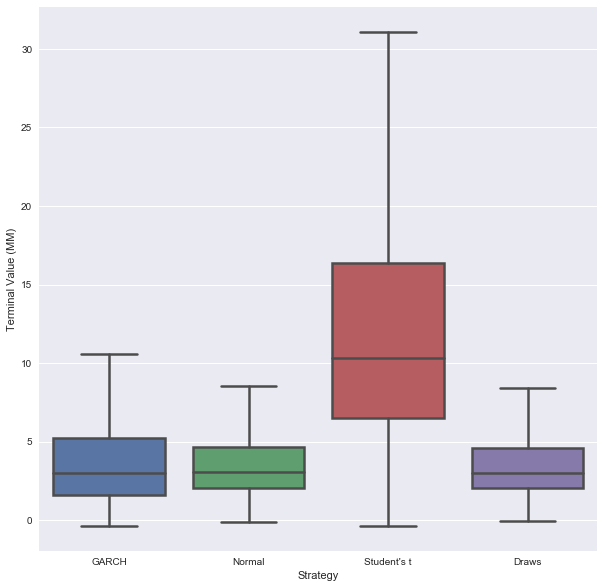

In [15]:
x = Data.loc[(slice(None), '2070-01-01'),:]
x = pd.melt(x)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("Terminal Value (MM)", rotation=0, loc='top', labelpad=-120 )
plt.xlabel("Distribution")
plt.ticklabel_format(style='plain', axis='y',useOffset=True, )
plt.savefig("Robustness/boxplot_SIM.png", bbox_inches = 'tight', pad_inches = 0.1)